In [0]:
import tensorflow as tf
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display
from PIL import Image
import pathlib

In [2]:
!wget http://www.vision.caltech.edu/Image_Datasets/Caltech101/101_ObjectCategories.tar.gz
!tar -xvzf ./101_ObjectCategories.tar.gz 

Streaming output truncated to the last 5000 lines.
101_ObjectCategories/chair/image_0006.jpg
101_ObjectCategories/chair/image_0007.jpg
101_ObjectCategories/chair/image_0008.jpg
101_ObjectCategories/chair/image_0010.jpg
101_ObjectCategories/chair/image_0011.jpg
101_ObjectCategories/chair/image_0012.jpg
101_ObjectCategories/chair/image_0013.jpg
101_ObjectCategories/chair/image_0014.jpg
101_ObjectCategories/chair/image_0016.jpg
101_ObjectCategories/chair/image_0017.jpg
101_ObjectCategories/chair/image_0018.jpg
101_ObjectCategories/chair/image_0019.jpg
101_ObjectCategories/chair/image_0020.jpg
101_ObjectCategories/chair/image_0022.jpg
101_ObjectCategories/chair/image_0023.jpg
101_ObjectCategories/chair/image_0024.jpg
101_ObjectCategories/chair/image_0025.jpg
101_ObjectCategories/chair/image_0026.jpg
101_ObjectCategories/chair/image_0028.jpg
101_ObjectCategories/chair/image_0029.jpg
101_ObjectCategories/chair/image_0030.jpg
101_ObjectCategories/chair/image_0031.jpg
101_ObjectCategories/chai

In [4]:
classes=os.listdir('101_ObjectCategories/')
classes

['wild_cat',
 'scissors',
 'wrench',
 'octopus',
 'ibis',
 'scorpion',
 'starfish',
 'chair',
 'minaret',
 'lotus',
 'dolphin',
 'joshua_tree',
 'bass',
 'lobster',
 'garfield',
 'umbrella',
 'ketch',
 'ewer',
 'water_lilly',
 'crocodile',
 'cougar_body',
 'okapi',
 'tick',
 'camera',
 'stapler',
 'accordion',
 'rooster',
 'binocular',
 'emu',
 'watch',
 'Faces_easy',
 'trilobite',
 'cup',
 'hedgehog',
 'rhino',
 'stegosaurus',
 'lamp',
 'ceiling_fan',
 'pizza',
 'barrel',
 'headphone',
 'sea_horse',
 'inline_skate',
 'pigeon',
 'windsor_chair',
 'BACKGROUND_Google',
 'crayfish',
 'bonsai',
 'Faces',
 'schooner',
 'stop_sign',
 'dalmatian',
 'gramophone',
 'ant',
 'cannon',
 'Leopards',
 'car_side',
 'yin_yang',
 'crab',
 'revolver',
 'mandolin',
 'mayfly',
 'platypus',
 'chandelier',
 'anchor',
 'laptop',
 'flamingo',
 'pagoda',
 'nautilus',
 'Motorbikes',
 'brain',
 'airplanes',
 'grand_piano',
 'buddha',
 'cougar_face',
 'beaver',
 'ferry',
 'soccer_ball',
 'dragonfly',
 'euphonium'

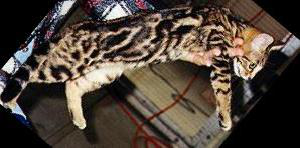

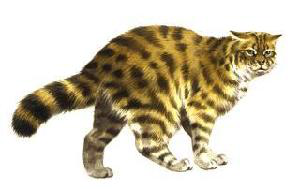

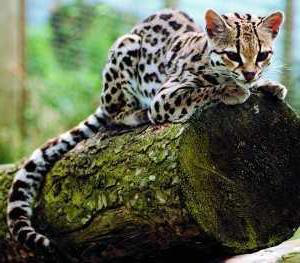

In [20]:
data_dir = pathlib.Path('101_ObjectCategories')
wild_cat = list(data_dir.glob('wild_cat/*'))
for image_path in wild_cat[:3]:
    display.display(Image.open(str(image_path)))

In [0]:
image_data_generator = ImageDataGenerator(rescale=1./255,validation_split=0.25) 

In [6]:
training_data = image_data_generator.flow_from_directory(batch_size=100,
                                                           directory='101_ObjectCategories/',
                                                           shuffle=True,
                                                           target_size=(150, 150),                                  
                                                           class_mode='binary')

Found 9144 images belonging to 102 classes.


In [0]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(150, 150 ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(102)
])

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

In [0]:
history = model.fit_generator(
    train_data_gen,
    epochs=5
)

Epoch 1/5
72/72 [==============================] - 195s 3s/step - loss: 3.1984 - accuracy: 0.3328
Epoch 2/5
72/72 [==============================] - 197s 3s/step - loss: 1.9794 - accuracy: 0.5443
Epoch 3/5
72/72 [==============================] - 200s 3s/step - loss: 1.2221 - accuracy: 0.6988
Epoch 4/5
72/72 [==============================] - 197s 3s/step - loss: 0.6254 - accuracy: 0.8358
Epoch 5/5
72/72 [==============================] - 196s 3s/step - loss: 0.3061 - accuracy: 0.9193
